# Naive Bayes Spam Filtering

### Overview

We all hate spam, so developing a classifier to classify email as spam or not spam is useful.  

### Builds on
None

### Run time
approx. 20-30 minutes

### Notes

We can do Naive Bayes classification.

## Step 1: Load Data
We will load the dataframe into pandas.  Since the outcome label is "ham" or "spam", that will be our label.

In [2]:
import pandas as pd
import os

data_location = '../data/spam/SMSSpamCollection.txt'
if not os.path.exists (data_location):
    data_location = 'https://elephantscale-public.s3.amazonaws.com/data/spam/SMSSpamCollection.txt'
print('data_location:', data_location)
    
dataset = pd.read_csv(data_location, sep='\t')
dataset

data_location: https://elephantscale-public.s3.amazonaws.com/data/spam/SMSSpamCollection.txt


,isspam,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Step 2 - Explore Data

In [3]:
## Count spam/ham
dataset.groupby("isspam").size()

isspam
ham     4825
spam     747
dtype: int64

## Step 3: Vectorize Using TF/IDF

Let's use tf/idf for vecorization at first.  TF/IDF will take and count the instances of each term, and then divide by the total frequecy of that term in the entire dataset.  

This leads to very highly dimensional data, because every word in the document will lead to a dimension in the data.

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


pipeline = Pipeline([('vec', CountVectorizer()),
                     ('tfidf', TfidfTransformer())])

### Understanding Text --> Vector 

Let's try to see small text data converted to vector format

In [5]:
sample = dataset.sample(3)
sample

,isspam,text
1763,ham,Sometimes Heart Remembrs someone Very much... ...
2219,ham,Nice talking to you! please dont forget my pix...
2063,ham,Is there any training tomorrow?


In [6]:
sample_vectorized = pipeline.fit_transform(sample['text'])
sample_vectorized

<3x38 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [7]:
# here is how vectorized data looks like! :-) 
pd.DataFrame(sample_vectorized.toarray())

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.000000,0.000000,0.185695,0.185695,0.185695,0.185695,0.000000,0.185695,0.185695,0.000000,...,0.185695,0.000000,0.000000,0.000000,0.000000,0.000000,0.185695,0.000000,0.371391,0.000000
1,0.229416,0.000000,0.000000,0.000000,0.000000,0.000000,0.229416,0.000000,0.000000,0.229416,...,0.000000,0.229416,0.000000,0.458831,0.000000,0.000000,0.000000,0.229416,0.000000,0.458831
2,0.000000,0.447214,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.447214,0.000000,0.447214,0.447214,0.000000,0.000000,0.000000,0.000000


In [8]:
## vectorize the 'text' column
x = pipeline.fit_transform(dataset['text'])
x

<5572x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 74169 stored elements in Compressed Sparse Row format>

In [9]:
## we can leave y as 'spam' / 'ham'
# y = dataset['isspam']

## encode y
y, y_mapping = pd.factorize(dataset['isspam'])

print ('y : ', y)
print ('mapping : ', y_mapping)

y :  [0 0 1 ... 0 0 0]
mapping :  Index(['ham', 'spam'], dtype='object')


In [10]:
## we can leave y as 'spam' / 'ham'
# y = dataset['isspam']

## encode y 
y = pd.factorize(dataset['isspam'])[0]
y

array([0, 0, 1, ..., 0, 0, 0])

## Step 4: Split train/test

In [11]:
## TODO: Use training / test split of 80%/20%

from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test = train_test_split(x,y,  test_size=0.2)
## to control train/test split set random_state to a number
# x_train,x_test,y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.3)

print ("x_train :" , x_train.shape )
print ("x_test :", x_test.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train : (4457, 8713)
x_test : (1115, 8713)
y_train : (4457,)
y_test : (1115,)


## Step 5 : Run Naive Bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB ()

model = nb.fit(x_train, y_train)
model

MultinomialNB()

## Step 6 - Inspect the Model

In [ ]:
print('coef : ', model.coef_)
print('intercept' , model.intercept_)

## Step 7 - Evaluate the model

### 7.1: Predict on test data


In [13]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
a = pd.DataFrame ({'label' : y_test, 'prediction' : y_pred })
a

,label,prediction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1110,0,0
1111,0,0
1112,0,0
1113,0,0


### 7.2 :  Score

Let's look at how our model performs.  We will do an accuracy measure.

In [15]:
model.score(x_test,y_test)

0.968609865470852

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.968609865470852

### 7.3 Confusion Matrix

Hmmm.. the positive case didn't do as well as the negative case. Why is that?

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[980,   0],
       [ 35, 100]])

[]

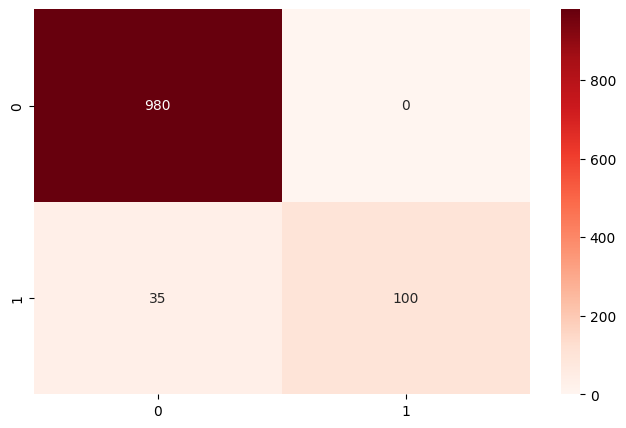

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

In [19]:
## Metrics calculated from Confusion Matrix
from sklearn.metrics import precision_recall_fscore_support

pd.DataFrame(list(precision_recall_fscore_support(y_test, y_pred)),
             columns=['ham', 'spam'],
             index=['Precision', 'Recall', "F1", "Support"])

,ham,spam
Precision,0.965517,1.000000
Recall,1.000000,0.740741
F1,0.982456,0.851064
Support,980.000000,135.000000


### 7.4 :  ROC Curve & AUC

For this to work, 'y' must be encoded as a number.

In [20]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.8703703703703703

In [21]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

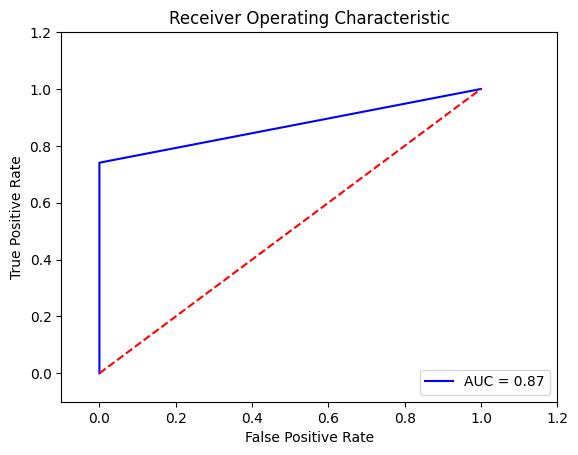

In [22]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Step 8:  Run your own data!

Now it's your turn!   Make a new dataframe with some sample test data of your own creation.  Make some "spammy" SMSes and some ordinary ones.  See how our spam filter does.

In [23]:
mydata = pd.DataFrame ( { 'text' : [
                                     'can we meet for lunch?',
                                     'win win win instant tickets!',
                                     'ultra cheap medications!!!',
                                     'heavy discountsssss on flight tickets!!!!',
                                     'discounts on flight tickets!!!!',
                                     'want to have discount on flight ticket?' 
]})

mydata

,text
0,can we meet for lunch?
1,win win win instant tickets!
2,ultra cheap medications!!!
3,heavy discountsssss on flight tickets!!!!
4,discounts on flight tickets!!!!
5,want to have discount on flight ticket?


In [24]:
my_x = pipeline.transform(mydata['text'])
my_x

<6x8713 sparse matrix of type '<class 'numpy.float64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [25]:
my_pred = model.predict(my_x)
my_pred

array([0, 1, 0, 0, 0, 0])

In [26]:
mydata['prediction'] = my_pred
mydata

,text,prediction
0,can we meet for lunch?,0
1,win win win instant tickets!,1
2,ultra cheap medications!!!,0
3,heavy discountsssss on flight tickets!!!!,0
4,discounts on flight tickets!!!!,0
5,want to have discount on flight ticket?,0


## FUN : How will you defeat this algorithm? :-) 

If you are spammer, how can you defeat this algorithm?

<img src="https://github.com/elephantscale/machine-learning-workshop/blob/main/assets/images/come-tothe-dark-side-iin-we-have-cookies.png?raw=1" />

## Further Reading
Checkout [Amazon Comprehend](https://us-west-2.console.aws.amazon.com/comprehend/v2/home?region=us-west-2#welcome) to parse natural text and extract meaning.